# Restaurant Customer Sentiment Analysis

## Init

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install sastrawi
!pip install nlp-id 

In [ ]:
# init
train_path = 'train_data_restaurant.tsv'

df_train = pd.read_csv(train_path,sep='\t',header=None)

## Data Exploration and Data Understanding

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1780 non-null   object
 1   1       1780 non-null   object
dtypes: object(2)
memory usage: 27.9+ KB


In [ ]:
print("5 Sample Data")
df_train.sample(5)

5 Sample Data


,0,1
204,Tepat subuh hari ini kami ke warung ini jelas ...,negative
779,"mahal. jangan datang waktu siang hari, karena ...",positive
706,Baru nyobain yg di setiabudi. Lumayan enak tem...,positive
1391,"Makanannya tidak terlalu mahal, beli pizza den...",positive
902,Salah satu snack otentik dari korea selatan. R...,positive


## Data Preprocessing

### Cleaning

Kandidat teknik cleaning data: <br>
1. Casefolding (lowercase)
2. Noise removal (non alphabet dan spasi)
3. Menghilangkan stopwords
4. Stemming dan Lemmatization
5. Mengubah kata alay
6. Menghilangkan pengulangan huruf (contoh : haloooo)


#### Casefolding

In [ ]:
# 1. Casefolding
df_train[0] = df_train[0].str.lower()
print("Penampakan setelah casefolding")
df_train.sample(5)

Penampakan setelah casefolding


,0,1
1056,makan kapau sih ok lah di bandung cuma nasi ny...,positive
225,terletak di lembang.kami melakukan perjalanan ...,negative
1633,waktu dateng ke sana liat pilihan menu nyaaaa ...,positive
601,"ketika saya berkunjung ke istana plaza, pulang...",positive
255,np summarecon bekasi pertama nyoba udah disugu...,negative


#### Remove non alphabet and non space

In [ ]:
# 2. Remove non alphabet and non space
df_train[0] = df_train[0].str.replace(r'[^\w\s]',' ',regex=True)
df_train[0] = df_train[0].str.replace(r'\d',' ',regex=True)
# Remove multiple spaces
df_train[0] = df_train[0].str.replace(r'(\s)\1{1,}',r'\1',regex=True)
print("Penampakan setelah remove non alphabet dan non spasi")
df_train.sample(5)

Penampakan setelah remove non alphabet dan non spasi


,0,1
353,air minum aja harus bayar padahal kita udah ke...,negative
637,jus strawberry nya mantap segerrr mienya juga ...,positive
907,resto yang sudah cukup lama berdiri kira tahun...,positive
78,kami makan di sini untuk pertama kali dan kami...,negative
1460,mozarunya top markotop yang paling saya suka b...,positive


#### Teriak normalization

In [ ]:
# 3. Teriak Normalization
import re

df_train[0] = df_train[0].str.replace(r'(.)\1{2,}',r'\1',regex=True)

#### Alay normalization

In [ ]:
# 4. Alay Normalization (ubah yang alay-alay)
# memakai kamus alay
# https://stackoverflow.com/questions/70056791/normalization-words-for-sentiment-analysis
kamus_alay_url = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
kamus_alay = pd.read_csv(kamus_alay_url)

In [ ]:
kamus_alay = kamus_alay.drop_duplicates(subset=['slang'])
kamus_alay.index = kamus_alay['slang']
kamus_alay = kamus_alay['formal']
kamus_alay = kamus_alay.str.replace(r'[^\w\s]',' ',regex=True)
kamus_alay = kamus_alay.str.replace(r'\d',' ',regex=True)
kamus_alay = kamus_alay.str.replace(r'(\s)\1{1,}',r'\1',regex=True)

In [ ]:
kamus_alay

slang
woww                  wow
aminn                amin
met               selamat
netaas            menetas
keberpa          keberapa
                ...      
cpet                cepat
gataunya    enggak taunya
gtau           enggak tau
fans2             fan fan
gaharus      enggak harus
Name: formal, Length: 4331, dtype: object

In [ ]:
temp = df_train[0].copy()
for i in kamus_alay.index:
  temp = temp.str.replace(r'\b' + i + r'\b',kamus_alay[i],regex=True)

In [ ]:
df_train[0] = temp

#### Remove stopwords

In [ ]:

# 5. Stopwords removal
# untuk stopwords, dibuat df_train baru untuk membandingkan hasil akhir antara df_train yang dihilangkan
# stopwordsnya dan yang tidak dihilangkan
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

print("Stopwords bahasa indonesia (5 teratas)")
stopwords.words('indonesian')[:5]

Stopwords bahasa indonesia (5 teratas)


['ada', 'adalah', 'adanya', 'adapun', 'agak']

In [ ]:
df_train['remove_sw'] = df_train[0].copy()
for s in stopwords.words('indonesian'):
  df_train['remove_sw'] = df_train['remove_sw'].str.replace(r'\b' + s + r'\b','',regex=True)

In [ ]:
df_train[df_train['remove_sw'] != df_train[0]]

,0,1,remove_sw
0,saya makan di sini dengan menggunakan voucher ...,negative,makan voucher disdus paket nasi ayam kari...
1,mas indosat buat main game enemy has been slai...,negative,mas indosat main game enemy has been slain su...
2,terus saya percuma dong update no hp terbaru k...,negative,update no hp terbaru cs cab bni kalo data...
3,jika kita pilih dia maka akan ada lebih dari k...,negative,pilih kampung digusur
4,dikarenakan adik saya suka dengan restoran ini...,negative,adik suka restoran mampir sih langs...
...,...,...,...
1775,sangat suka minuman di sini selain merah meria...,positive,suka minuman merah meriah enak manis p...
1776,saat pertama saya melihat suasana di damai res...,positive,suasana damai resto ramai sambut rim...
1777,restoran yang terletak di kawasan intercontine...,positive,restoran terletak kawasan intercontinental h...
1778,pilihan kayak baso dll nya banyakk di sinii ma...,positive,pilihan kayak baso dll nya banyakk sinii un...


#### Stemming and Lemmatizing

In [ ]:
# 6. Stemming and Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nlp_id.lemmatizer import Lemmatizer

In [ ]:
# stem
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# lemmatize
lemmatizer = Lemmatizer() 

In [ ]:
df_train['stem'] = df_train['remove_sw'].copy()
df_train['lemmatize'] = df_train['remove_sw'].copy()

In [ ]:
df_train['stem'] = df_train['stem'].apply(stemmer.stem)

In [ ]:
df_train['lemmatize'] = df_train['lemmatize'].apply(lemmatizer.lemmatize)

In [ ]:
df_train.sample(5)

,0,1,remove_sw,stem,lemmatize
817,buat yang doyan sambel boleh loh dicoba makan ...,positive,doyan sambel loh dicoba makan sambel pedes...,doyan sambel loh coba makan sambel pedesnya ju...,doyan sambel loh coba makan sambel pedesnya ju...
1529,saya jarang makan steak yang benaran karena ma...,positive,jarang makan steak benaran mahal steakny...,jarang makan steak benar mahal steaknya benar ...,jarang makan steak benar mahal steaknya benar ...
646,saya suka makan di sini rasanya yang enak deng...,positive,suka makan enak harga sebanding ribu...,suka makan enak harga banding ribu orang kali ...,suka makan enak harga banding ribu orang kali ...
935,menu dan harga yang ditawarkan sama saja denga...,positive,menu harga ditawarkan sapu lidi tempatny...,menu harga tawar sapu lidi tempat luas mes nas...,menu harga tawar sapu lidi tempat luas pesan n...
937,kami baru pertama kali ini ketempat ini sepert...,positive,kali ketempat saudara bandung memp...,kali tempat saudara bandung kenal masakan masa...,kali tempat saudara bandung kenal masakan masa...


In [ ]:
# checkpoint
df_train.to_csv('train_data_clean.csv')

### Analisis dengan Word Cloud

In [ ]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud

In [ ]:
df_train[1].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
# positive
df_pos = df_train[df_train[1] == 'positive']
all_text = " ".join(text for text in df_pos[0])
all_text_remove_sw = " ".join(text for text in df_pos['remove_sw'])
all_text_stem = " ".join(text for text in df_pos['stem'])
all_text_lemmatize = " ".join(text for text in df_pos['lemmatize'])

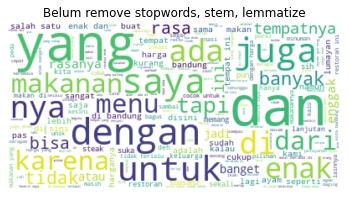

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Belum remove stopwords, stem, lemmatize")
plt.axis("off")
plt.show()

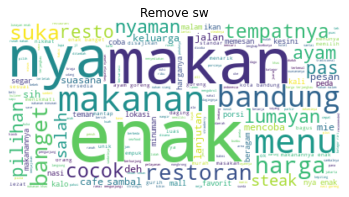

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_remove_sw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Remove sw")
plt.axis("off")
plt.show()

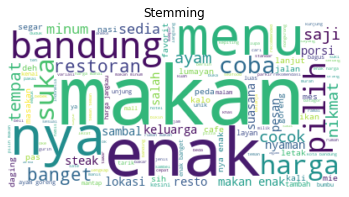

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_stem)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Stemming")
plt.axis("off")
plt.show()

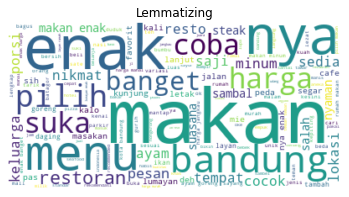

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_lemmatize)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Lemmatizing")
plt.axis("off")
plt.show()

In [ ]:
# negative
df_neg = df_train[df_train[1] == 'negative']
all_text = " ".join(text for text in df_neg[0])
all_text_remove_sw = " ".join(text for text in df_neg['remove_sw'])
all_text_stem = " ".join(text for text in df_neg['stem'])
all_text_lemmatize = " ".join(text for text in df_neg['lemmatize'])

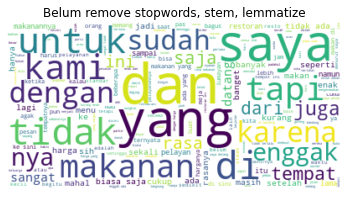

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Belum remove stopwords, stem, lemmatize")
plt.axis("off")
plt.show()

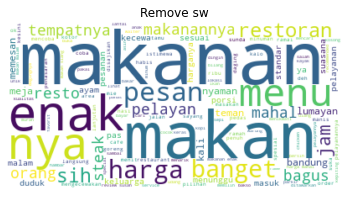

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_remove_sw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Remove sw")
plt.axis("off")
plt.show()

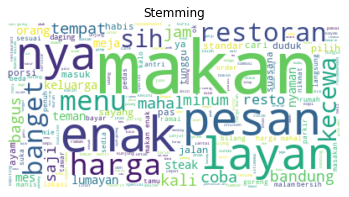

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_stem)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Stemming")
plt.axis("off")
plt.show()

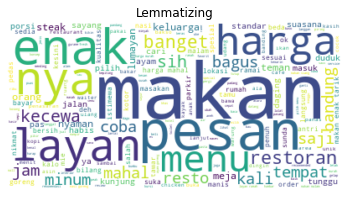

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_text_lemmatize)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Lemmatizing")
plt.axis("off")
plt.show()

**Hasil analisis sementara**

1. Terdapat kata yang selalu mendominasi seperti kata 'makan' atau 'makanan' yang tidak memiliki polarisasi ke positif atau negatif secara umum


**Analisis per grup**

1. Positif <br>
Remove sw : makan, makanan, nya, bandung, enak <br>
Stem : idem dengan remove sw <br>
Lemmatize : idem dengan remove sw
2. Negatif <br>
Remove sw : makanan, makan, nya, enak, menu <br>
Stem : makan, pesan, enak, layan, nya <br>
Lemmatize : idem dengan stem

Dapat dilihat masih ada beberapa stopwords seperti 'nya' yang tidak dihilangkan, akan dihilangkan terlebih dahulu untuk kolom remove_sw, kolom stem, kolom lemmatize. Untuk kata lain non polar (secara umum tidak mengandung sentimen) akan dibiarkan terlebih dahulu

In [ ]:
df_train['remove_sw'] = df_train['remove_sw'].str.replace(r'\bnya\b','',regex=True)
df_train['stem'] = df_train['stem'].str.replace(r'\bnya\b','',regex=True)
df_train['lemmatize'] = df_train['lemmatize'].str.replace(r'\bnya\b','',regex=True)

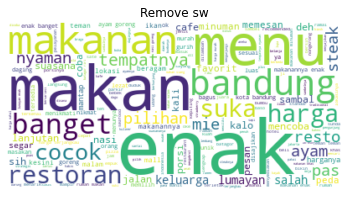

In [ ]:
# uji melihat wordcloud remove sw untuk positif
df_pos = df_train[df_train[1] == 'positive']
all_text_remove_sw = " ".join(text for text in df_pos['remove_sw'])
wordcloud = WordCloud(background_color="white").generate(all_text_remove_sw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Remove sw")
plt.axis("off")
plt.show()

In [ ]:
df_train.sample(5)

,0,1,remove_sw,stem,lemmatize
1500,ramen yang ditawarkan di sini melebihi ekspekt...,positive,ramen ditawarkan melebihi ekspektasi en...,ramen tawar lebih ekspektasi enak banding rame...,ramen tawar lebih ekspektasi enak banding rame...
1114,selalu kalo ke bandung wajib makan batagor ata...,positive,kalo bandung wajib makan batagor beli mi...,kalo bandung wajib makan batagor beli minggu k...,kalo bandung wajib makan batagor beli minggu k...
1667,lumayan laah untuk sekedar ngopi untuk makanan...,positive,lumayan laah sekedar ngopi makanan piliha...,lumayan laah dar ngopi makan pilih harga stand...,lumayan laah dar ngopi makan pilih harga stand...
1628,tempat nyaman dan teduh parkir agak sulit namu...,positive,nyaman teduh parkir sulit tersedia lokasi...,nyaman teduh parkir sulit sedia lokasi graha q...,nyaman teduh parkir sulit sedia lokasi graha q...
1135,batagor riri merupakan salah satu jenis makana...,positive,batagor riri salah jenis makanan beli ...,batagor riri salah jenis makan beli kota bandu...,batagor riri salah jenis makan beli kota bandu...


### Pre Modeling

In [366]:
# load check point
df_train = pd.read_csv('train_data_clean.csv')
X = df_train[['0','remove_sw','stem','lemmatize']].copy()
y = df_train['1'].copy()
X.head()

,0,remove_sw,stem,lemmatize
0,saya makan di sini dengan menggunakan voucher ...,makan voucher disdus paket nasi ayam kari...,makan voucher disdus paket nasi ayam kari disk...,makan voucher disdus paket nasi ayam kari disk...
1,mas indosat buat main game enemy has been slai...,mas indosat main game enemy has been slain su...,mas indosat main game enemy has been slain sus...,mas indosat main game enemy has been slain sus...
2,terus saya percuma dong update no hp terbaru k...,update no hp terbaru cs cab bni kalo data...,update no hp baru cs cab bni kalo data bni no ...,update no hp baru cs cab bni kalo data bni no ...
3,jika kita pilih dia maka akan ada lebih dari k...,pilih kampung digusur,pilih kampung gusur,pilih kampung gusur
4,dikarenakan adik saya suka dengan restoran ini...,adik suka restoran mampir sih langs...,adik suka restoran mampir sih langsung sreg si...,adik suka restoran mampir sih langsung sreg si...


In [367]:
y.value_counts()

positive    1200
negative     580
Name: 1, dtype: int64

#### Word Embedding

In [8]:
# https://www.kdnuggets.com/2021/11/guide-word-embedding-techniques-nlp.html

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_0 = TfidfVectorizer()
tfidf_remove_sw = TfidfVectorizer()
tfidf_stem = TfidfVectorizer()
tfidf_lemmatize = TfidfVectorizer()

In [12]:
X_vect = {}
X_vect['0'] = tfidf_0.fit_transform(X['0'])
X_vect['remove_sw'] = tfidf_remove_sw.fit_transform(X['remove_sw'])
X_vect['stem'] = tfidf_stem.fit_transform(X['stem'])
X_vect['lemmatize'] = tfidf_lemmatize.fit_transform(X['lemmatize'])

#### Label Encoding

In [371]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [373]:
np.unique(y,return_counts=True)

(array([0, 1]), array([ 580, 1200]))

## Modeling

Akan diujikan berbagai model, mulai dari tradisional sampai deep learning. Model akan divalidasi menggunakan cross validation, tidak akan terlalu banyak melakukan hyper parameter tuning untuk melihat secara umum perbandingan antara model dengan dataset yang ada

https://scikit-learn.org/stable/modules/cross_validation.html

In [191]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [192]:
metrics = ['accuracy','f1','precision','recall']

### Complement Naive Bayes

- Adaptasi dari mutlinomialNB
- Biasanya dipakai untuk data yang imbalanced
- Umumnya lebih baik daripada multinomialNB

src : arsip pribadi https://docs.google.com/presentation/d/1ZBBfLafXlK6WyDplvkD9ex8A7qyvrz9Tv0-rZZZS98I/edit#slide=id.gf2dfb37102_0_35

In [14]:
from sklearn.naive_bayes import ComplementNB

In [22]:
# store models
model_cnb = {}
score_cnb = {}

In [193]:
# x type 0
model_cnb['0'] = ComplementNB()
score_cnb['0'] = cross_validate(model_cnb['0'],X_vect['0'],y,cv=skf,scoring=metrics)

In [194]:
score_cnb['0']

{'fit_time': array([0.01745915, 0.01131701, 0.00428653, 0.01539373, 0.01788807]),
 'score_time': array([0.02415156, 0.00624418, 0.01309562, 0.02089357, 0.00720072]),
 'test_accuracy': array([0.80898876, 0.79213483, 0.81741573, 0.8258427 , 0.79775281]),
 'test_f1': array([0.87453875, 0.86446886, 0.88029466, 0.88389513, 0.86466165]),
 'test_precision': array([0.78476821, 0.77124183, 0.78877888, 0.80272109, 0.78767123]),
 'test_recall': array([0.9875    , 0.98333333, 0.99583333, 0.98333333, 0.95833333])}

In [195]:
# x type remove_sw
model_cnb['remove_sw'] = ComplementNB()
score_cnb['remove_sw'] = cross_validate(model_cnb['remove_sw'],X_vect['remove_sw'],y,cv=skf,scoring=metrics)

In [196]:
score_cnb['remove_sw']

{'fit_time': array([0.00740027, 0.00296664, 0.00258851, 0.00247407, 0.00239873]),
 'score_time': array([0.00573993, 0.00357771, 0.00351024, 0.00353146, 0.00350904]),
 'test_accuracy': array([0.78932584, 0.78089888, 0.81179775, 0.83146067, 0.81741573]),
 'test_f1': array([0.85981308, 0.85555556, 0.87476636, 0.88505747, 0.87475915]),
 'test_precision': array([0.77966102, 0.77      , 0.79322034, 0.81914894, 0.81362007]),
 'test_recall': array([0.95833333, 0.9625    , 0.975     , 0.9625    , 0.94583333])}

In [197]:
# x type stem
model_cnb['stem'] = ComplementNB()
score_cnb['stem'] = cross_validate(model_cnb['stem'],X_vect['stem'],y,cv=skf,scoring=metrics)

In [198]:
score_cnb['stem']

{'fit_time': array([0.00549436, 0.00477719, 0.00465989, 0.00239563, 0.00214052]),
 'score_time': array([0.00830674, 0.00869179, 0.00714874, 0.00344634, 0.00337434]),
 'test_accuracy': array([0.79213483, 0.77808989, 0.82865169, 0.8258427 , 0.82022472]),
 'test_f1': array([0.86037736, 0.85233645, 0.88468809, 0.88030888, 0.8745098 ]),
 'test_precision': array([0.7862069 , 0.77288136, 0.80968858, 0.82014388, 0.82592593]),
 'test_recall': array([0.95      , 0.95      , 0.975     , 0.95      , 0.92916667])}

In [199]:
# x ype lemmatize
model_cnb['lemmatize'] = ComplementNB()
score_cnb['lemmatize'] = cross_validate(model_cnb['lemmatize'],X_vect['0'],y,cv=skf,scoring=metrics)

In [200]:
score_cnb['lemmatize']

{'fit_time': array([0.00980806, 0.00274158, 0.00253105, 0.00262976, 0.00251102]),
 'score_time': array([0.00636268, 0.00354242, 0.00346112, 0.00355697, 0.00360966]),
 'test_accuracy': array([0.80898876, 0.79213483, 0.81741573, 0.8258427 , 0.79775281]),
 'test_f1': array([0.87453875, 0.86446886, 0.88029466, 0.88389513, 0.86466165]),
 'test_precision': array([0.78476821, 0.77124183, 0.78877888, 0.80272109, 0.78767123]),
 'test_recall': array([0.9875    , 0.98333333, 0.99583333, 0.98333333, 0.95833333])}

### XGBoost

https://www.datacamp.com/community/tutorials/xgboost-in-python <br>
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters <br>
https://github.com/dmlc/xgboost/tree/master/demo/guide-python <br>
https://stackoverflow.com/questions/41135987/why-xgboost-cv-and-sklearn-cross-val-score-give-different-results

In [201]:
from xgboost.sklearn import XGBClassifier

In [202]:
# store models
model_xgb = {}
score_xgb = {}

In [203]:
# x type 0
model_xgb['0'] = XGBClassifier()
score_xgb['0'] = cross_validate(model_xgb['0'],X_vect['0'],y,cv=skf,scoring=metrics)

In [204]:
score_xgb['0']

{'fit_time': array([1.21395397, 1.17637849, 1.1937592 , 1.1710999 , 1.17139244]),
 'score_time': array([0.01106954, 0.01100683, 0.01045561, 0.01065421, 0.01081491]),
 'test_accuracy': array([0.8005618 , 0.78370787, 0.82022472, 0.85674157, 0.82303371]),
 'test_f1': array([0.85996055, 0.84931507, 0.87596899, 0.89940828, 0.87573964]),
 'test_precision': array([0.8164794 , 0.80073801, 0.81884058, 0.85393258, 0.83146067]),
 'test_recall': array([0.90833333, 0.90416667, 0.94166667, 0.95      , 0.925     ])}

In [205]:
# x type remove_sw
model_xgb['remove_sw'] = XGBClassifier()
score_xgb['remove_sw'] = cross_validate(model_xgb['remove_sw'],X_vect['remove_sw'],y,cv=skf,scoring=metrics)

In [206]:
score_xgb['remove_sw']

{'fit_time': array([0.93915033, 0.92383599, 0.91389203, 0.8998239 , 0.9405582 ]),
 'score_time': array([0.00937462, 0.00916219, 0.00937438, 0.00927472, 0.00909591]),
 'test_accuracy': array([0.7752809 , 0.76404494, 0.76685393, 0.80617978, 0.78932584]),
 'test_f1': array([0.85239852, 0.84210526, 0.84485981, 0.86956522, 0.85928705]),
 'test_precision': array([0.76490066, 0.76712329, 0.76610169, 0.79584775, 0.78156997]),
 'test_recall': array([0.9625    , 0.93333333, 0.94166667, 0.95833333, 0.95416667])}

In [207]:
# x type stem
model_xgb['stem'] = XGBClassifier()
score_xgb['stem'] = cross_validate(model_xgb['stem'],X_vect['stem'],y,cv=skf,scoring=metrics)

In [208]:
score_xgb['stem']

{'fit_time': array([0.80607915, 0.7945137 , 0.77644372, 0.79265475, 0.7587924 ]),
 'score_time': array([0.00866151, 0.00808334, 0.00816321, 0.00899792, 0.00843   ]),
 'test_accuracy': array([0.78370787, 0.76685393, 0.78370787, 0.78089888, 0.7752809 ]),
 'test_f1': array([0.85553471, 0.84543762, 0.85714286, 0.85171103, 0.84848485]),
 'test_precision': array([0.778157  , 0.76430976, 0.77257525, 0.78321678, 0.77777778]),
 'test_recall': array([0.95      , 0.94583333, 0.9625    , 0.93333333, 0.93333333])}

In [209]:
# x type lemmatize
model_xgb['lemmatize'] = XGBClassifier()
score_xgb['lemmatize'] = cross_validate(model_xgb['lemmatize'],X_vect['lemmatize'],y,cv=skf,scoring=metrics)

In [210]:
score_xgb['lemmatize']

{'fit_time': array([0.77993321, 0.78385282, 0.76681709, 0.74462843, 0.76454997]),
 'score_time': array([0.0106194 , 0.008147  , 0.01224971, 0.0080483 , 0.00823736]),
 'test_accuracy': array([0.78089888, 0.76966292, 0.7752809 , 0.8005618 , 0.7752809 ]),
 'test_f1': array([0.85338346, 0.84586466, 0.85130112, 0.86527514, 0.8490566 ]),
 'test_precision': array([0.77739726, 0.77054795, 0.76845638, 0.79442509, 0.77586207]),
 'test_recall': array([0.94583333, 0.9375    , 0.95416667, 0.95      , 0.9375    ])}

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
# store models
model_rf = {}
score_rf = {}

In [213]:
# x type 0
model_rf['0'] = RandomForestClassifier()
score_rf['0'] = cross_validate(model_rf['0'],X_vect['0'],y,cv=skf,scoring=metrics)

In [214]:
score_rf['0']

{'fit_time': array([1.02997923, 1.00184989, 0.93723369, 0.96718669, 0.93381476]),
 'score_time': array([0.03787041, 0.03787994, 0.03310013, 0.03297901, 0.03180742]),
 'test_accuracy': array([0.77808989, 0.77808989, 0.83146067, 0.84269663, 0.79775281]),
 'test_f1': array([0.856102  , 0.85288641, 0.8880597 , 0.89393939, 0.866171  ]),
 'test_precision': array([0.7605178 , 0.77104377, 0.80405405, 0.81944444, 0.78187919]),
 'test_recall': array([0.97916667, 0.95416667, 0.99166667, 0.98333333, 0.97083333])}

In [215]:
# x type remove_sw
model_rf['remove_sw'] = RandomForestClassifier()
score_rf['remove_sw'] = cross_validate(model_rf['remove_sw'],X_vect['remove_sw'],y,cv=skf,scoring=metrics)

In [216]:
score_rf['remove_sw']

{'fit_time': array([1.22119474, 1.0983808 , 1.08689904, 1.09377313, 1.06855392]),
 'score_time': array([0.03532887, 0.03357315, 0.03364277, 0.03299379, 0.03764915]),
 'test_accuracy': array([0.78651685, 0.76404494, 0.79213483, 0.80337079, 0.79494382]),
 'test_f1': array([0.85820896, 0.84615385, 0.86446886, 0.87132353, 0.86556169]),
 'test_precision': array([0.77702703, 0.75490196, 0.77124183, 0.77960526, 0.77557756]),
 'test_recall': array([0.95833333, 0.9625    , 0.98333333, 0.9875    , 0.97916667])}

In [217]:
# x type stem
model_rf['stem'] = RandomForestClassifier()
score_rf['stem'] = cross_validate(model_rf['stem'],X_vect['stem'],y,cv=skf,scoring=metrics)

In [218]:
score_rf['stem']

{'fit_time': array([0.999789  , 0.99981809, 0.97166538, 0.96640182, 0.98426986]),
 'score_time': array([0.03160715, 0.03588295, 0.03767037, 0.03133512, 0.03263927]),
 'test_accuracy': array([0.76404494, 0.78932584, 0.78651685, 0.80898876, 0.79213483]),
 'test_f1': array([0.84444444, 0.8603352 , 0.8597786 , 0.87453875, 0.86142322]),
 'test_precision': array([0.76      , 0.77777778, 0.77152318, 0.78476821, 0.78231293]),
 'test_recall': array([0.95      , 0.9625    , 0.97083333, 0.9875    , 0.95833333])}

In [219]:
# x type lemmatize
model_rf['lemmatize'] = RandomForestClassifier()
score_rf['lemmatize'] = cross_validate(model_rf['lemmatize'],X_vect['lemmatize'],y,cv=skf,scoring=metrics)

In [220]:
score_rf['lemmatize']

{'fit_time': array([1.0306778 , 0.96864414, 0.95164394, 0.98663735, 0.96933484]),
 'score_time': array([0.03379226, 0.03848815, 0.03581381, 0.03238297, 0.03255653]),
 'test_accuracy': array([0.7752809 , 0.76685393, 0.79494382, 0.81179775, 0.80898876]),
 'test_f1': array([0.85185185, 0.84714549, 0.8650647 , 0.87476636, 0.87265918]),
 'test_precision': array([0.76666667, 0.75907591, 0.77740864, 0.79322034, 0.79251701]),
 'test_recall': array([0.95833333, 0.95833333, 0.975     , 0.975     , 0.97083333])}

### SVMClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [221]:
from sklearn.svm import SVC

In [222]:
# store models
model_svm = {}
score_svm = {}

In [223]:
# x type 0
model_svm['0'] = SVC()
score_svm['0'] = cross_validate(model_svm['0'],X_vect['0'],y,cv=skf,scoring=metrics)

In [224]:
score_svm['0']

{'fit_time': array([0.7289238 , 0.69848347, 0.67783642, 0.69043994, 0.6888783 ]),
 'score_time': array([0.15461421, 0.15894222, 0.14712882, 0.14678359, 0.14399171]),
 'test_accuracy': array([0.8258427 , 0.83426966, 0.87078652, 0.88483146, 0.84550562]),
 'test_f1': array([0.88076923, 0.88499025, 0.91085271, 0.91976517, 0.89402697]),
 'test_precision': array([0.81785714, 0.83150183, 0.85144928, 0.86715867, 0.83154122]),
 'test_recall': array([0.95416667, 0.94583333, 0.97916667, 0.97916667, 0.96666667])}

In [225]:
# x type remove_sw
model_svm['remove_sw'] = SVC()
score_svm['remove_sw'] = cross_validate(model_svm['remove_sw'],X_vect['remove_sw'],y,cv=skf,scoring=metrics)

In [226]:
score_svm['remove_sw']

{'fit_time': array([0.46189022, 0.45020223, 0.453017  , 0.43708706, 0.44146252]),
 'score_time': array([0.09810925, 0.10006738, 0.09834743, 0.09850788, 0.09819674]),
 'test_accuracy': array([0.7752809 , 0.76404494, 0.79775281, 0.80898876, 0.79213483]),
 'test_f1': array([0.85454545, 0.84615385, 0.86909091, 0.875     , 0.86346863]),
 'test_precision': array([0.75806452, 0.75490196, 0.77096774, 0.78289474, 0.77483444]),
 'test_recall': array([0.97916667, 0.9625    , 0.99583333, 0.99166667, 0.975     ])}

In [227]:
# x type stem
model_svm['stem'] = SVC()
score_svm['stem'] = cross_validate(model_svm['stem'],X_vect['stem'],y,cv=skf,scoring=metrics)

In [228]:
score_svm['stem']

{'fit_time': array([0.44110227, 0.42842245, 0.43989348, 0.43726325, 0.42969537]),
 'score_time': array([0.09363222, 0.10091877, 0.09407496, 0.09574032, 0.09392095]),
 'test_accuracy': array([0.78651685, 0.7752809 , 0.80617978, 0.82865169, 0.81460674]),
 'test_f1': array([0.85925926, 0.85185185, 0.87198516, 0.88555347, 0.875     ]),
 'test_precision': array([0.77333333, 0.76666667, 0.78595318, 0.80546075, 0.80208333]),
 'test_recall': array([0.96666667, 0.95833333, 0.97916667, 0.98333333, 0.9625    ])}

In [229]:
# x type lemmatize
model_svm['lemmatize'] = SVC()
score_svm['lemmatize'] = cross_validate(model_svm['lemmatize'],X_vect['lemmatize'],y,cv=skf,scoring=metrics)

In [230]:
score_svm['lemmatize']

{'fit_time': array([0.443645  , 0.42744732, 0.42589283, 0.42038107, 0.42048645]),
 'score_time': array([0.09395194, 0.10400248, 0.09368706, 0.10020375, 0.09243131]),
 'test_accuracy': array([0.78651685, 0.7752809 , 0.80898876, 0.82865169, 0.81460674]),
 'test_f1': array([0.85925926, 0.85239852, 0.87407407, 0.88512241, 0.8754717 ]),
 'test_precision': array([0.77333333, 0.76490066, 0.78666667, 0.80756014, 0.8       ]),
 'test_recall': array([0.96666667, 0.9625    , 0.98333333, 0.97916667, 0.96666667])}

### Recurrent Neural Network

Untuk RNN, terdapat teknik word embeddingnya sendiri yang tersedia pada tensorflow


https://stackoverflow.com/questions/61907589/how-to-calculate-tf-idf-using-tft-tfidf-function-in-tensorflow-transform <br>
https://stackoverflow.com/questions/60195735/use-tf-idf-with-in-keras-model <br>
https://www.tensorflow.org/guide/keras/rnn

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate, Dense, RNN, SimpleRNNCell, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [167]:
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Simple RNN

In [168]:
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
rnn = RNN(SimpleRNNCell(64) , return_sequences=False,return_state=False)
model.add(rnn)
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['0'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 68ms/step - loss: 0.6376 - accuracy: 0.6556 - f1_m: 0.7571 - precision_m: 0.6995 - recall_m: 0.9268
Epoch 2/10
56/56 [==============================] - 3s 47ms/step - loss: 0.6305 - accuracy: 0.6742 - f1_m: 0.8017 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 3s 52ms/step - loss: 0.6276 - accuracy: 0.6742 - f1_m: 0.8017 - precision_m: 0.6733 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6282 - accuracy: 0.6742 - f1_m: 0.8007 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 72ms/step - loss: 0.6304 - accuracy: 0.6742 - f1_m: 0.8016 - precision_m: 0.6733 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 74ms/step - loss: 0.6348 - accuracy: 0.6742 - f1_m: 0.8034 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 69ms/step - los

In [169]:
# x type remove_sw
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['remove_sw'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
rnn = RNN(SimpleRNNCell(64) , return_sequences=False,return_state=False)
model.add(rnn)
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['remove_sw'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 5s 57ms/step - loss: 0.6365 - accuracy: 0.6629 - f1_m: 0.7618 - precision_m: 0.6413 - recall_m: 0.9464
Epoch 2/10
56/56 [==============================] - 4s 68ms/step - loss: 0.6345 - accuracy: 0.6742 - f1_m: 0.8022 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 72ms/step - loss: 0.6333 - accuracy: 0.6742 - f1_m: 0.8039 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 70ms/step - loss: 0.6342 - accuracy: 0.6708 - f1_m: 0.7995 - precision_m: 0.6727 - recall_m: 0.9927
Epoch 5/10
56/56 [==============================] - 4s 70ms/step - loss: 0.6395 - accuracy: 0.6657 - f1_m: 0.7945 - precision_m: 0.6743 - recall_m: 0.9784
Epoch 6/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6381 - accuracy: 0.6742 - f1_m: 0.8037 - precision_m: 0.6747 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 70ms/step - los

In [170]:
# x type stem
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['stem'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
rnn = RNN(SimpleRNNCell(64) , return_sequences=False,return_state=False)
model.add(rnn)
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['stem'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 78ms/step - loss: 0.6417 - accuracy: 0.6573 - f1_m: 0.7724 - precision_m: 0.6471 - recall_m: 0.9643
Epoch 2/10
56/56 [==============================] - 4s 65ms/step - loss: 0.6334 - accuracy: 0.6730 - f1_m: 0.8029 - precision_m: 0.6749 - recall_m: 0.9983
Epoch 3/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6349 - accuracy: 0.6730 - f1_m: 0.8018 - precision_m: 0.6753 - recall_m: 0.9961
Epoch 4/10
56/56 [==============================] - 4s 73ms/step - loss: 0.6335 - accuracy: 0.6742 - f1_m: 0.8035 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6401 - accuracy: 0.6742 - f1_m: 0.8028 - precision_m: 0.6763 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 73ms/step - loss: 0.6340 - accuracy: 0.6742 - f1_m: 0.8032 - precision_m: 0.6757 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 69ms/step - los

In [171]:
# x type lemmatize
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['lemmatize'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
rnn = RNN(SimpleRNNCell(64) , return_sequences=False,return_state=False)
model.add(rnn)
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['lemmatize'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 65ms/step - loss: 0.6420 - accuracy: 0.6629 - f1_m: 0.7725 - precision_m: 0.6522 - recall_m: 0.9583
Epoch 2/10
56/56 [==============================] - 4s 71ms/step - loss: 0.6357 - accuracy: 0.6742 - f1_m: 0.8024 - precision_m: 0.6753 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 72ms/step - loss: 0.6320 - accuracy: 0.6742 - f1_m: 0.8026 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 2s 36ms/step - loss: 0.6419 - accuracy: 0.6629 - f1_m: 0.7911 - precision_m: 0.6725 - recall_m: 0.9759
Epoch 5/10
56/56 [==============================] - 2s 37ms/step - loss: 0.6366 - accuracy: 0.6719 - f1_m: 0.7998 - precision_m: 0.6747 - recall_m: 0.9929
Epoch 6/10
56/56 [==============================] - 2s 36ms/step - loss: 0.6397 - accuracy: 0.6663 - f1_m: 0.7930 - precision_m: 0.6745 - recall_m: 0.9743
Epoch 7/10
56/56 [==============================] - 2s 37ms/step - los

#### LSTM

In [137]:
from tensorflow.keras.layers import LSTM

In [172]:
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(LSTM(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['0'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 8s 82ms/step - loss: 0.6400 - accuracy: 0.6742 - f1_m: 0.8009 - precision_m: 0.6730 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6365 - accuracy: 0.6742 - f1_m: 0.8031 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6340 - accuracy: 0.6742 - f1_m: 0.8027 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6327 - accuracy: 0.6742 - f1_m: 0.8025 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6327 - accuracy: 0.6742 - f1_m: 0.8037 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 5s 83ms/step - loss: 0.6326 - accuracy: 0.6742 - f1_m: 0.8035 - precision_m: 0.6753 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 82ms/step - los

In [173]:
# x type remove_sw
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['remove_sw'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(LSTM(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['remove_sw'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 82ms/step - loss: 0.6373 - accuracy: 0.6730 - f1_m: 0.7894 - precision_m: 0.6642 - recall_m: 0.9821
Epoch 2/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6329 - accuracy: 0.6742 - f1_m: 0.8030 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6334 - accuracy: 0.6742 - f1_m: 0.8026 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6320 - accuracy: 0.6742 - f1_m: 0.8023 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6342 - accuracy: 0.6742 - f1_m: 0.8014 - precision_m: 0.6730 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6330 - accuracy: 0.6742 - f1_m: 0.8024 - precision_m: 0.6747 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 82ms/step - los

In [174]:
# x type stem
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['stem'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(LSTM(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['stem'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 8s 83ms/step - loss: 0.6416 - accuracy: 0.6742 - f1_m: 0.8032 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6341 - accuracy: 0.6742 - f1_m: 0.8014 - precision_m: 0.6730 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6327 - accuracy: 0.6742 - f1_m: 0.8026 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6332 - accuracy: 0.6742 - f1_m: 0.8023 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6329 - accuracy: 0.6742 - f1_m: 0.8012 - precision_m: 0.6730 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 5s 88ms/step - loss: 0.6358 - accuracy: 0.6742 - f1_m: 0.8031 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 82ms/step - los

In [175]:
# x type lemmatize
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['lemmatize'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(LSTM(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['lemmatize'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 82ms/step - loss: 0.6403 - accuracy: 0.6742 - f1_m: 0.8034 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6325 - accuracy: 0.6742 - f1_m: 0.8031 - precision_m: 0.6747 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6326 - accuracy: 0.6742 - f1_m: 0.8033 - precision_m: 0.6747 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6323 - accuracy: 0.6742 - f1_m: 0.8026 - precision_m: 0.6730 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 5s 81ms/step - loss: 0.6338 - accuracy: 0.6742 - f1_m: 0.8024 - precision_m: 0.6747 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 5s 82ms/step - loss: 0.6338 - accuracy: 0.6742 - f1_m: 0.8018 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 82ms/step - los

#### GRU

In [146]:
from tensorflow.keras.layers import GRU

In [176]:
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(GRU(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['0'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 74ms/step - loss: 0.6377 - accuracy: 0.6742 - f1_m: 0.8025 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6324 - accuracy: 0.6742 - f1_m: 0.8025 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6333 - accuracy: 0.6742 - f1_m: 0.8028 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6327 - accuracy: 0.6742 - f1_m: 0.8030 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6322 - accuracy: 0.6742 - f1_m: 0.8039 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6332 - accuracy: 0.6742 - f1_m: 0.8028 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 76ms/step - los

In [177]:
# x type remove_sw
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['remove_sw'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(GRU(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['remove_sw'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 76ms/step - loss: 0.6357 - accuracy: 0.6742 - f1_m: 0.8021 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6322 - accuracy: 0.6742 - f1_m: 0.8019 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6321 - accuracy: 0.6742 - f1_m: 0.8031 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6326 - accuracy: 0.6742 - f1_m: 0.8020 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6319 - accuracy: 0.6742 - f1_m: 0.8032 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6325 - accuracy: 0.6742 - f1_m: 0.8023 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 77ms/step - los

In [178]:
# x type stem
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['stem'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(GRU(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['stem'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 77ms/step - loss: 0.6412 - accuracy: 0.6742 - f1_m: 0.8011 - precision_m: 0.6733 - recall_m: 1.0000
Epoch 2/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6324 - accuracy: 0.6742 - f1_m: 0.8020 - precision_m: 0.6733 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6329 - accuracy: 0.6742 - f1_m: 0.8017 - precision_m: 0.6733 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 77ms/step - loss: 0.6350 - accuracy: 0.6742 - f1_m: 0.8024 - precision_m: 0.6753 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6329 - accuracy: 0.6742 - f1_m: 0.8030 - precision_m: 0.6753 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6331 - accuracy: 0.6742 - f1_m: 0.8012 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 4s 76ms/step - los

In [179]:
# x type lemmatize
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['lemmatize'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(GRU(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['lemmatize'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 7s 75ms/step - loss: 0.6369 - accuracy: 0.6685 - f1_m: 0.7880 - precision_m: 0.6623 - recall_m: 0.9821
Epoch 2/10
56/56 [==============================] - 4s 75ms/step - loss: 0.6330 - accuracy: 0.6742 - f1_m: 0.8032 - precision_m: 0.6740 - recall_m: 1.0000
Epoch 3/10
56/56 [==============================] - 4s 78ms/step - loss: 0.6320 - accuracy: 0.6742 - f1_m: 0.8027 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 77ms/step - loss: 0.6322 - accuracy: 0.6742 - f1_m: 0.8034 - precision_m: 0.6743 - recall_m: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 77ms/step - loss: 0.6359 - accuracy: 0.6742 - f1_m: 0.8021 - precision_m: 0.6737 - recall_m: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 76ms/step - loss: 0.6327 - accuracy: 0.6742 - f1_m: 0.8024 - precision_m: 0.6750 - recall_m: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 81ms/step - los

#### Bidirectional LSTM

In [155]:
from tensorflow.keras.layers import Bidirectional

In [180]:
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['0'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 143ms/step - loss: 0.6005 - accuracy: 0.6888 - f1_m: 0.8082 - precision_m: 0.6961 - recall_m: 0.9802
Epoch 2/10
56/56 [==============================] - 8s 142ms/step - loss: 0.3182 - accuracy: 0.8702 - f1_m: 0.9037 - precision_m: 0.8984 - recall_m: 0.9176
Epoch 3/10
56/56 [==============================] - 8s 142ms/step - loss: 0.2026 - accuracy: 0.9258 - f1_m: 0.9426 - precision_m: 0.9511 - recall_m: 0.9392
Epoch 4/10
56/56 [==============================] - 8s 144ms/step - loss: 0.1571 - accuracy: 0.9449 - f1_m: 0.9587 - precision_m: 0.9565 - recall_m: 0.9625
Epoch 5/10
56/56 [==============================] - 8s 150ms/step - loss: 0.1173 - accuracy: 0.9612 - f1_m: 0.9709 - precision_m: 0.9738 - recall_m: 0.9697
Epoch 6/10
56/56 [==============================] - 8s 146ms/step - loss: 0.0731 - accuracy: 0.9770 - f1_m: 0.9829 - precision_m: 0.9858 - recall_m: 0.9808
Epoch 7/10
56/56 [==============================] - 8s 145ms/st

In [181]:
# x type remove_sw
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['remove_sw'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['remove_sw'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 146ms/step - loss: 0.6181 - accuracy: 0.6854 - f1_m: 0.8065 - precision_m: 0.6865 - recall_m: 0.9907
Epoch 2/10
56/56 [==============================] - 8s 140ms/step - loss: 0.3652 - accuracy: 0.8360 - f1_m: 0.8787 - precision_m: 0.8655 - recall_m: 0.9018
Epoch 3/10
56/56 [==============================] - 8s 140ms/step - loss: 0.2256 - accuracy: 0.9067 - f1_m: 0.9311 - precision_m: 0.9252 - recall_m: 0.9411
Epoch 4/10
56/56 [==============================] - 8s 147ms/step - loss: 0.1593 - accuracy: 0.9399 - f1_m: 0.9544 - precision_m: 0.9531 - recall_m: 0.9582
Epoch 5/10
56/56 [==============================] - 8s 142ms/step - loss: 0.1057 - accuracy: 0.9657 - f1_m: 0.9744 - precision_m: 0.9755 - recall_m: 0.9746
Epoch 6/10
56/56 [==============================] - 8s 143ms/step - loss: 0.0742 - accuracy: 0.9787 - f1_m: 0.9840 - precision_m: 0.9856 - recall_m: 0.9835
Epoch 7/10
56/56 [==============================] - 8s 140ms/st

In [182]:
# x type stem
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['stem'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['stem'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 143ms/step - loss: 0.6231 - accuracy: 0.6702 - f1_m: 0.7877 - precision_m: 0.6629 - recall_m: 0.9821
Epoch 2/10
56/56 [==============================] - 8s 141ms/step - loss: 0.3748 - accuracy: 0.8343 - f1_m: 0.8786 - precision_m: 0.8666 - recall_m: 0.9011
Epoch 3/10
56/56 [==============================] - 13s 227ms/step - loss: 0.2340 - accuracy: 0.9079 - f1_m: 0.9314 - precision_m: 0.9333 - recall_m: 0.9344
Epoch 4/10
56/56 [==============================] - 14s 240ms/step - loss: 0.1770 - accuracy: 0.9331 - f1_m: 0.9496 - precision_m: 0.9444 - recall_m: 0.9583
Epoch 5/10
56/56 [==============================] - 13s 232ms/step - loss: 0.1239 - accuracy: 0.9567 - f1_m: 0.9681 - precision_m: 0.9671 - recall_m: 0.9708
Epoch 6/10
56/56 [==============================] - 10s 181ms/step - loss: 0.0648 - accuracy: 0.9809 - f1_m: 0.9849 - precision_m: 0.9833 - recall_m: 0.9874
Epoch 7/10
56/56 [==============================] - 8s 141m

In [183]:
# x type lemmatize
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['lemmatize'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['lemmatize'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 143ms/step - loss: 0.5663 - accuracy: 0.7051 - f1_m: 0.8059 - precision_m: 0.7137 - recall_m: 0.9508
Epoch 2/10
56/56 [==============================] - 8s 144ms/step - loss: 0.3455 - accuracy: 0.8517 - f1_m: 0.8877 - precision_m: 0.8877 - recall_m: 0.8950
Epoch 3/10
56/56 [==============================] - 8s 144ms/step - loss: 0.2265 - accuracy: 0.9112 - f1_m: 0.9319 - precision_m: 0.9346 - recall_m: 0.9344
Epoch 4/10
56/56 [==============================] - 8s 144ms/step - loss: 0.1611 - accuracy: 0.9354 - f1_m: 0.9507 - precision_m: 0.9476 - recall_m: 0.9573
Epoch 5/10
56/56 [==============================] - 8s 143ms/step - loss: 0.0941 - accuracy: 0.9702 - f1_m: 0.9773 - precision_m: 0.9773 - recall_m: 0.9781
Epoch 6/10
56/56 [==============================] - 8s 144ms/step - loss: 0.0676 - accuracy: 0.9815 - f1_m: 0.9861 - precision_m: 0.9866 - recall_m: 0.9862
Epoch 7/10
56/56 [==============================] - 8s 145ms/st

#### Bidirectional GRU

In [184]:
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['0'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 154ms/step - loss: 0.6252 - accuracy: 0.6657 - f1_m: 0.7867 - precision_m: 0.6638 - recall_m: 0.9765
Epoch 2/10
56/56 [==============================] - 9s 159ms/step - loss: 0.4738 - accuracy: 0.7848 - f1_m: 0.8443 - precision_m: 0.8146 - recall_m: 0.8853
Epoch 3/10
56/56 [==============================] - 8s 136ms/step - loss: 0.3404 - accuracy: 0.8393 - f1_m: 0.8804 - precision_m: 0.8700 - recall_m: 0.8982
Epoch 4/10
56/56 [==============================] - 7s 132ms/step - loss: 0.2407 - accuracy: 0.9022 - f1_m: 0.9251 - precision_m: 0.9303 - recall_m: 0.9254
Epoch 5/10
56/56 [==============================] - 7s 133ms/step - loss: 0.1778 - accuracy: 0.9337 - f1_m: 0.9485 - precision_m: 0.9525 - recall_m: 0.9481
Epoch 6/10
56/56 [==============================] - 7s 131ms/step - loss: 0.1301 - accuracy: 0.9567 - f1_m: 0.9670 - precision_m: 0.9683 - recall_m: 0.9679
Epoch 7/10
56/56 [==============================] - 7s 134ms/st

In [185]:
# x type remove_sw
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['remove_sw'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['remove_sw'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 12s 131ms/step - loss: 0.6227 - accuracy: 0.6702 - f1_m: 0.7846 - precision_m: 0.6735 - recall_m: 0.9664
Epoch 2/10
56/56 [==============================] - 7s 129ms/step - loss: 0.4261 - accuracy: 0.8056 - f1_m: 0.8599 - precision_m: 0.8296 - recall_m: 0.9005
Epoch 3/10
56/56 [==============================] - 7s 128ms/step - loss: 0.2907 - accuracy: 0.8820 - f1_m: 0.9123 - precision_m: 0.9030 - recall_m: 0.9264
Epoch 4/10
56/56 [==============================] - 7s 127ms/step - loss: 0.2072 - accuracy: 0.9174 - f1_m: 0.9378 - precision_m: 0.9350 - recall_m: 0.9444
Epoch 5/10
56/56 [==============================] - 7s 129ms/step - loss: 0.1565 - accuracy: 0.9433 - f1_m: 0.9575 - precision_m: 0.9559 - recall_m: 0.9616
Epoch 6/10
56/56 [==============================] - 7s 129ms/step - loss: 0.1542 - accuracy: 0.9427 - f1_m: 0.9564 - precision_m: 0.9563 - recall_m: 0.9596
Epoch 7/10
56/56 [==============================] - 7s 129ms/st

In [186]:
# x type stem
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['stem'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['stem'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 12s 132ms/step - loss: 0.6209 - accuracy: 0.6708 - f1_m: 0.7985 - precision_m: 0.6738 - recall_m: 0.9938
Epoch 2/10
56/56 [==============================] - 8s 135ms/step - loss: 0.4358 - accuracy: 0.8112 - f1_m: 0.8610 - precision_m: 0.8439 - recall_m: 0.8905
Epoch 3/10
56/56 [==============================] - 7s 131ms/step - loss: 0.3062 - accuracy: 0.8747 - f1_m: 0.9052 - precision_m: 0.9015 - recall_m: 0.9151
Epoch 4/10
56/56 [==============================] - 7s 134ms/step - loss: 0.2289 - accuracy: 0.9101 - f1_m: 0.9317 - precision_m: 0.9305 - recall_m: 0.9351
Epoch 5/10
56/56 [==============================] - 8s 137ms/step - loss: 0.1848 - accuracy: 0.9326 - f1_m: 0.9478 - precision_m: 0.9469 - recall_m: 0.9511
Epoch 6/10
56/56 [==============================] - 8s 136ms/step - loss: 0.1518 - accuracy: 0.9483 - f1_m: 0.9597 - precision_m: 0.9627 - recall_m: 0.9586
Epoch 7/10
56/56 [==============================] - 7s 132ms/st

In [187]:
# x type lemmatize
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['lemmatize'])

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))
model.add(vectorize_layer)
model.add(Embedding(max_tokens + 1, 128))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])

model.fit(X['lemmatize'],y, epochs=10)

Epoch 1/10
56/56 [==============================] - 13s 136ms/step - loss: 0.6203 - accuracy: 0.6770 - f1_m: 0.8030 - precision_m: 0.6794 - recall_m: 0.9900
Epoch 2/10
56/56 [==============================] - 8s 134ms/step - loss: 0.4151 - accuracy: 0.8096 - f1_m: 0.8585 - precision_m: 0.8449 - recall_m: 0.8806
Epoch 3/10
56/56 [==============================] - 7s 130ms/step - loss: 0.2718 - accuracy: 0.8921 - f1_m: 0.9184 - precision_m: 0.9183 - recall_m: 0.9226
Epoch 4/10
56/56 [==============================] - 7s 131ms/step - loss: 0.2017 - accuracy: 0.9208 - f1_m: 0.9384 - precision_m: 0.9398 - recall_m: 0.9404
Epoch 5/10
56/56 [==============================] - 7s 128ms/step - loss: 0.1350 - accuracy: 0.9534 - f1_m: 0.9643 - precision_m: 0.9664 - recall_m: 0.9635
Epoch 6/10
56/56 [==============================] - 7s 134ms/step - loss: 0.1043 - accuracy: 0.9624 - f1_m: 0.9711 - precision_m: 0.9726 - recall_m: 0.9710
Epoch 7/10
56/56 [==============================] - 8s 134ms/st

### RNN Model Selection

Setelah dilakukan pengujian ke berbagai model RNN didapat model RNN terbaik dengan menggunakan layer bidirectional LSTM dan GRU menghasilkan performa yang lebih baik.

Menurut https://analyticsindiamag.com/lstm-vs-gru-in-recurrent-neural-network-a-comparative-study/ , GRU memiliki performa yang lebih baik dibandingkan LSTM pada sequence kata yang lebih kecil, serta GRU memiliki eksekusi yang lebih singkat dibandingkan LSTM

Karena di antara keempat tipe dataset diperoleh hasil yang relatif sama, untuk pemilihan dari keempat tipe dataset (preprocess standard, menghilangkan stopword, stemming, lemmatizing), akan dipilih dataset yang memiliki langkah preprocess yang lebih singkat agar ketika digunakan, eksekusi model lebih cepat. Serta, untuk RNN, dugaan pribadi saya bahwa penghilangan stopwords itu bisa ditackle dengan baik oleh RNN karena tekniknya yang lebih advance untuk data-data sekuensial dibandingkan FFNN.

Sebelum pemilihan model final, akan dilakukan cross validation untuk  RNN

In [434]:
# Remodeling
# x type 0
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)
vectorize_layer.adapt(X['0'])

def create_rnn():
  model_rnn = Sequential()
  model_rnn.add(Input(shape=(1,), dtype="string"))
  model_rnn.add(vectorize_layer)
  model_rnn.add(Embedding(max_tokens + 1, 128))
  model_rnn.add(Bidirectional(GRU(64)))
  model_rnn.add(Dense(64, activation="relu"))
  model_rnn.add(Dense(1, activation="sigmoid"))

  model_rnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,precision_m,recall_m])
  return model_rnn

In [460]:
score_rnn = {
    'accuracy' : [],
    'f1' : [],
    'precision' : [],
    'recall' : []
}

In [439]:
from sklearn.metrics import *

In [465]:
for train_index, val_index in skf.split(X['0'], y):
  # print("TRAIN:", train_index, "TEST:", val_index)
  X_train, X_val = X['0'].values[train_index], X['0'].values[val_index]
  y_train, y_true = y[train_index], y[val_index]
  model_rnn = create_rnn()
  model_rnn.fit(X_train,y_train,epochs=10,verbose=0)
  y_pred = model_rnn.predict(X_val)
  y_pred = np.round(y_pred)
  score_rnn['accuracy'].append(accuracy_score(y_true,y_pred))
  score_rnn['f1'].append(f1_score(y_true,y_pred))
  score_rnn['precision'].append(precision_score(y_true,y_pred))
  score_rnn['recall'].append(accuracy_score(y_true,y_pred))

In [468]:
for s in score_rnn.keys():
  score_rnn[s] = np.array(score_rnn[s])

In [469]:
score_rnn

{'accuracy': array([0.79775281, 0.80337079, 0.83426966, 0.82022472, 0.84269663]),
 'f1': array([0.8487395 , 0.8553719 , 0.88128773, 0.86721992, 0.87826087]),
 'precision': array([0.8559322 , 0.84836066, 0.85214008, 0.86363636, 0.91818182]),
 'recall': array([0.79775281, 0.80337079, 0.83426966, 0.82022472, 0.84269663])}

## General Model Performance Analysis

In [470]:
xs_column = ['0','remove_sw','stem','lemmatize']
score_traditional = {
    'score_cnb' : score_cnb,
    'score_xgb' : score_xgb,
    'score_rf' : score_rf,
    'score_svm' : score_svm
}
metric_col = ['f1','accuracy']

In [473]:
chosen_traditional = {
    'accuracy' : {
        'model' : None,
        'score' : -np.inf,
        'col' : None
    },
    'f1' : {
        'model' : None,
        'score' : -np.inf,
        'col' : None
    }
}
for model in score_traditional.keys():
  for col in xs_column:
    for met in chosen_traditional.keys():
      met2 = 'test_' + met
      mean = np.mean(score_traditional[model][col][met2])
      if mean > chosen_traditional[met]['score']:
        chosen_traditional[met]['score'] = mean
        chosen_traditional[met]['model'] = model
        chosen_traditional[met]['col'] = col

In [476]:
(chosen_traditional)

{'accuracy': {'col': '0', 'model': 'score_svm', 'score': 0.852247191011236},
 'f1': {'col': '0', 'model': 'score_svm', 'score': 0.898080867730234}}

In [478]:
print('accuracy rnn', score_rnn['accuracy'].mean())
print('f1 rnn', score_rnn['f1'].mean())

accuracy rnn 0.8196629213483145
f1 rnn 0.866175981912116


Diperoleh model dengan konfigurasi umum terbaik adalah SVM, berikutnya akan dilakukan hyperparameter tuning SVM Classifier

## Hyperparameter Tuning

Sebelum finalisasi, akan dilakukan tuning pada hyperparameter SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [479]:
np.bincount(y)

array([ 580, 1200])

In [485]:
class_weight = y.shape[0]/(2*np.bincount(y))

In [486]:
class_weight = {
    0 : class_weight[0],
    1 : class_weight[1]
}

In [487]:
class_weight

{0: 1.5344827586206897, 1: 0.7416666666666667}

In [520]:
from sklearn.model_selection import GridSearchCV

params = {
    'kernel' : ['poly','rbf'],
    'class_weight' : [class_weight, {0 : 1, 1 : 1}],
    'gamma' : ['scale','auto'],
    'degree' : [3,4,5]
}

svc = GridSearchCV(estimator=SVC(random_state=42),
                   param_grid=params, 
                   refit = True, 
                   verbose = 3, 
                   cv = skf, 
                   scoring='f1')

In [521]:
svc.fit(X_vect['0'],y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=poly;, score=0.808 total time=   0.9s
[CV 2/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=poly;, score=0.808 total time=   0.9s
[CV 3/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=poly;, score=0.809 total time=   0.9s
[CV 4/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=poly;, score=0.814 total time=   0.9s
[CV 5/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=poly;, score=0.807 total time=   2.2s
[CV 1/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gamma=scale, kernel=rbf;, score=0.888 total time=   1.1s
[CV 2/5] END class_weight={0: 1.5344827586206897, 1: 0.7416666666666667}, degree=3, gam

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid={'class_weight': [{0: 1.5344827586206897,
                                           1: 0.7416666666666667},
                                          {0: 1, 1: 1}],
                         'degree': [3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf']},
             scoring='f1', verbose=3)

In [522]:
svc.best_score_

0.9041682365388996

In [523]:
svc.best_params_

{'class_weight': {0: 1.5344827586206897, 1: 0.7416666666666667},
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [524]:
params = {
    'gamma' : [0.1, 1, 10, 100,'scale'],
    'C' : [0.1, 1, 10, 100, 1000],
}

svc = GridSearchCV(estimator=SVC(random_state=42,kernel='rbf'),
                   param_grid=params, 
                   refit = True, 
                   verbose = 3, 
                   cv = skf, 
                   scoring='f1')

In [525]:
svc.fit(X_vect['0'],y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.805 total time=   1.3s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.805 total time=   1.3s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.805 total time=   1.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.805 total time=   1.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.805 total time=   1.0s
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.805 total time=   1.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.805 total time=   1.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.805 total time=   1.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.805 total time=   1.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.805 total time=   1.0s
[CV 1/5] END ...................C=0.1, gamma=10;, score=0.805 total time=   0.9s
[CV 2/5] END ...................C=0.1, gamma=10

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 10, 100, 'scale']},
             scoring='f1', verbose=3)

In [526]:
svc.best_params_

{'C': 10, 'gamma': 1}

In [527]:
svc.best_score_

0.9034417065075837

In [536]:
def create_weight(C):
  res = C * np.array(list(class_weight.values()))
  res = {
      0 : res[0],
      1 : res[1]
  }
  return res

In [540]:
params = {
    'C' : [1, 10, 100, 1000],
    'class_weight' : [create_weight(1),create_weight(10),create_weight(100),create_weight(1000)]
}

svc = GridSearchCV(estimator=SVC(random_state=42,kernel='rbf',gamma=1),
                   param_grid=params, 
                   refit = True, 
                   verbose = 3, 
                   cv = skf, 
                   scoring='f1')

In [541]:
svc.fit(X_vect['0'],y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=1, class_weight={0: 1.5344827586206897, 1: 0.7416666666666667};, score=0.888 total time=   1.4s
[CV 2/5] END C=1, class_weight={0: 1.5344827586206897, 1: 0.7416666666666667};, score=0.888 total time=   2.3s
[CV 3/5] END C=1, class_weight={0: 1.5344827586206897, 1: 0.7416666666666667};, score=0.908 total time=   2.5s
[CV 4/5] END C=1, class_weight={0: 1.5344827586206897, 1: 0.7416666666666667};, score=0.928 total time=   2.2s
[CV 5/5] END C=1, class_weight={0: 1.5344827586206897, 1: 0.7416666666666667};, score=0.909 total time=   2.0s
[CV 1/5] END C=1, class_weight={0: 15.344827586206897, 1: 7.416666666666667};, score=0.891 total time=   1.8s
[CV 2/5] END C=1, class_weight={0: 15.344827586206897, 1: 7.416666666666667};, score=0.888 total time=   2.3s
[CV 3/5] END C=1, class_weight={0: 15.344827586206897, 1: 7.416666666666667};, score=0.909 total time=   1.2s
[CV 4/5] END C=1, class_weight={0: 15.344827586206897,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(gamma=1, random_state=42),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': [{0: 1.5344827586206897,
                                           1: 0.7416666666666667},
                                          {0: 15.344827586206897,
                                           1: 7.416666666666667},
                                          {0: 153.44827586206898,
                                           1: 74.16666666666667},
                                          {0: 1534.4827586206898,
                                           1: 741.6666666666667}]},
             scoring='f1', verbose=3)

In [543]:
svc.best_params_

{'C': 1, 'class_weight': {0: 1.5344827586206897, 1: 0.7416666666666667}}

In [544]:
svc.best_score_

0.9041682365388996

## Model Preparation and Testing

Akan dibuat custom tensorflow layer yang menangani preprocess sebagai berikut:
1. Casefolding
2. Removing non alphabet and non space
3. Teriak normalization
4. Alay normalization

https://stackoverflow.com/questions/62095767/how-to-create-a-custom-preprocessinglayer-in-tf-2-2

### Preparation

In [579]:
import pandas as pd
import numpy as np
import re

kamus_alay_url = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
class Preprocessor:
  def __init__(self,kamus_alay_url=kamus_alay_url):
    kamus_alay = pd.read_csv(kamus_alay_url)
    kamus_alay = kamus_alay.drop_duplicates(subset=['slang'])
    kamus_alay.index = kamus_alay['slang']
    kamus_alay = kamus_alay['formal']
    kamus_alay.index = r'\b'+ kamus_alay.index + r'\b'
    self.kamus_alay = kamus_alay
  
  def _preproc_df(self,data):
    data_ = data.copy()
    data_ = data_.str.lower()
    data_ = data_.str.replace(r'[^\w\s]',' ',regex=True)
    data_ = data_.str.replace(r'\d',' ',regex=True)
    data_ = data_.str.replace(r'(\s)\1{1,}',r'\1',regex=True)
    data_ = data_.str.replace(r'(.)\1{2,}',r'\1',regex=True)
    return data_
  
  def _normal_preprocess(self,data):
    if str(type(data)) == "<class 'pandas.core.series.Series'>":
      return self._preproc_df(data)
    elif str(type(data)) == "<class 'numpy.ndarray'>" or type(data) == list:
      data_ = pd.Series(data)
      return self._preproc_df(data_)
    elif type(data) == str:
      data_ = pd.Series([data])
      return self._preproc_df(data_).iloc[0]
    else:
      raise Exception("Data should be string/list/numpy array/ pandas series, your data type:",type(data))
  
  def preprocess(self,data):
    data_ = self._normal_preprocess(data)
    if type(data) != str:
      data_ = data_.replace(self.kamus_alay,regex=True)
      return data_
    # else if str
    data_ = data_.split()
    for w in range(len(data_)):
      appended_word = r'\b' + data_[w] +  r'\b'
      if appended_word in self.kamus_alay.index:
        data_[w] = re.sub(appended_word,self.kamus_alay[appended_word],data_[w])
    data_ = " ".join(data_)
    return data_
  
  def __call__(self,inputs):
    return self.preprocess(inputs)

Helper
1. Label encoder
2. Tfidf vectorizer
3. Preprocessor

In [580]:
class RestaurantSentimentModel:
  def __init__(self):
    self.le = le
    self.vect = tfidf_0
    self.preproc = Preprocessor()
    self.inner_model = svc
  
  def predict(self,X_,preproc=True,encoded=True):
    try:
      X = X_.copy()
    except:
      X = np.array(X_)
    if preproc:
      X = self.preproc(X)
    X = self.vect.transform(X)
    res = self.inner_model.predict(X)
    if encoded:
      return res
    return le.inverse_transform(res)

In [581]:
finale_model = RestaurantSentimentModel()

### Testing

In [582]:
df_test = pd.read_csv('test_data_restaurant.tsv',sep='\t',header=None)

In [583]:
df_test.head()

,0,1
0,"Tempatnya sih menarik, mudah dijangkau dari se...",negative
1,lokasi strategis penasaran karena daerah situ ...,negative
2,"Sesuai namanya, restoran ini unik dalam menyaj...",negative
3,Saya datang ketika petang dan hujan deras temp...,negative
4,"Kalao mau ke sana jangan pas malem sih, soalny...",negative


In [584]:
X_test = df_test[0]
y_true = df_test[1]

In [585]:
y_true = le.transform(y_true)

In [586]:
y_pred = finale_model.predict(X_test)

In [592]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [591]:
print(classification_report(y_true,y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.87      0.82      0.84        65
    positive       0.90      0.93      0.92       120

    accuracy                           0.89       185
   macro avg       0.89      0.87      0.88       185
weighted avg       0.89      0.89      0.89       185



In [606]:
print("accuracy:", accuracy_score(y_true,y_pred))
print("f1-score binary:",f1_score(y_true,y_pred))
print("f1-score micro:",f1_score(y_true,y_pred,average="micro"))
print("f1-score macro:",f1_score(y_true,y_pred,average="macro"))

accuracy: 0.8918918918918919
f1-score binary: 0.9180327868852459
f1-score micro: 0.8918918918918919
f1-score macro: 0.8796513140775435


Diperoleh hasil test sebagai berikut:
1. Accuracy score : 89.18%
2. F1 Score Binary : 91.8%
3. F1 Score Micro : 89.18%
4. F1 Score Macro : 87.96%

## Serialize Model

Model akan diserialisasikan menggunakan library pickle

In [594]:
import pickle

In [595]:
def dump_obj(obj,filename):

  file = open(filename, 'wb')

  pickle.dump(obj, file)

  file.close()

In [598]:
dump_obj(finale_model,'model_assemble.p')
dump_obj(svc,'svm_model.p')
dump_obj(le,'label_encoder.p')
dump_obj(tfidf_0,'tfidf_vect.p')
dump_obj(Preprocessor(),'preprocessor.p')